In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from src.functions import (drop_irrelevant_columns, 
                            remove_all_punctuation,
                            drop_rows_with_missing,
                            plot_avg_price_per_borough,
                            plot_most_frequent_room_type_per_borough,
                            plot_avg_minimum_nights_per_borough,
                            plot_avg_price_by_availability_bucket,
                            plot_topX_expensive_neighborhoods_min_listings
)

# %load_ext autoreload
# %autoreload 2

# Load data
file_path = r'C:\Users\pablo\vscode101\sql-database\AB_NYC_2019.csv'

# df1 = pd.read_csv(file_path, sep=",")
df1 = pd.read_csv(file_path)

# Quick look at columns and missingness
display(df1.info())
# df.dtypes
# df.nunique()
# df.describe()
# display(df.isna().sum())
# display((df.isna().sum()/df.shape[0])*100)
# df.head()
# Display the first few rows
display(df1.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

None

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [2]:
# Drop unnecessary columns
columns_to_drop = ['id', 'host_id', 'host_name', 'latitude', 'longitude', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count']
df1 = drop_irrelevant_columns(df1, columns_to_drop)

In [3]:
# Remove all punctuation and all special characters (keeps only letters, numbers, and spaces)
df1 = remove_all_punctuation(df1, 'name')

In [4]:
df1.head(5)

,name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,availability_365
0,Clean quiet apt home by the park,Brooklyn,Kensington,Private room,149,1,365
1,Skylit Midtown Castle,Manhattan,Midtown,Entire home/apt,225,1,355
2,THE VILLAGE OF HARLEMNEW YORK,Manhattan,Harlem,Private room,150,3,365
3,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,Entire home/apt,89,1,194
4,Entire Apt Spacious StudioLoft by central park,Manhattan,East Harlem,Entire home/apt,80,10,0


In [5]:
display(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 48879 non-null  object
 1   neighbourhood_group  48895 non-null  object
 2   neighbourhood        48895 non-null  object
 3   room_type            48895 non-null  object
 4   price                48895 non-null  int64 
 5   minimum_nights       48895 non-null  int64 
 6   availability_365     48895 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 2.6+ MB


None

In [6]:
# Display count of null/NaN per column
display(df1.isna().sum()) #/df1.shape[0])*100)

name                   16
neighbourhood_group     0
neighbourhood           0
room_type               0
price                   0
minimum_nights          0
availability_365        0
dtype: int64

In [7]:
#Remove any row from df1 where the name column has a missing (null/NaN) value
columns_to_drop = ['name']
df1 = drop_rows_with_missing(df1, columns_to_drop)

In [8]:
df1

,name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,availability_365
0,Clean quiet apt home by the park,Brooklyn,Kensington,Private room,149,1,365
1,Skylit Midtown Castle,Manhattan,Midtown,Entire home/apt,225,1,355
2,THE VILLAGE OF HARLEMNEW YORK,Manhattan,Harlem,Private room,150,3,365
3,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,Entire home/apt,89,1,194
4,Entire Apt Spacious StudioLoft by central park,Manhattan,East Harlem,Entire home/apt,80,10,0
...,...,...,...,...,...,...,...
48890,Charming one bedroom newly renovated rowhouse,Brooklyn,Bedford-Stuyvesant,Private room,70,2,9
48891,Affordable room in BushwickEast Williamsburg,Brooklyn,Bushwick,Private room,40,4,36
48892,Sunny Studio at Historical Neighborhood,Manhattan,Harlem,Entire home/apt,115,10,27
48893,43rd St Time Squarecozy single bed,Manhattan,Hell's Kitchen,Shared room,55,1,2


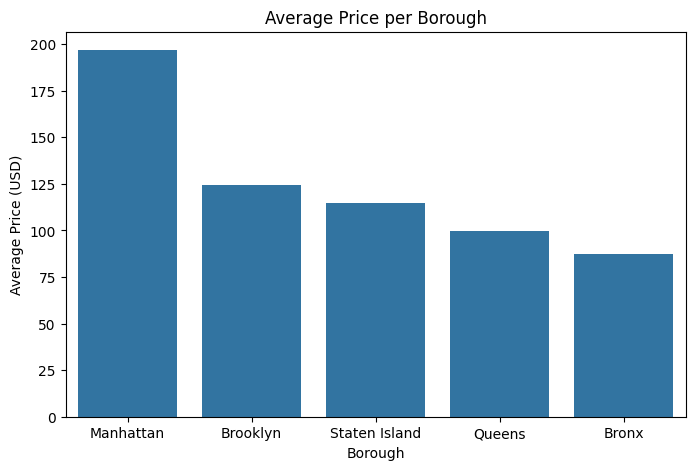

In [9]:
plot_avg_price_per_borough(df1)

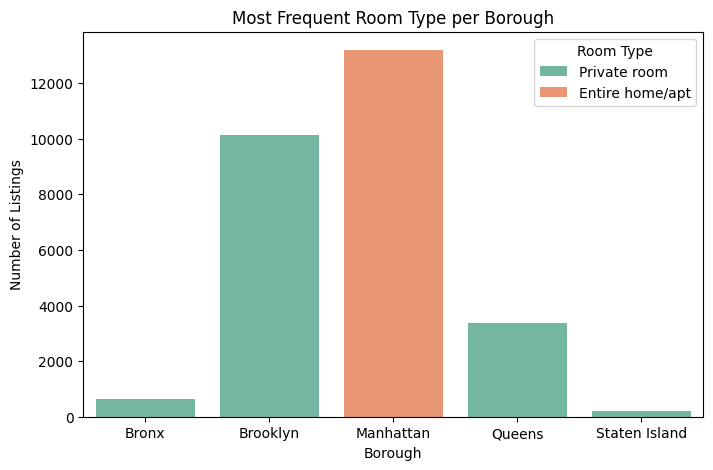

In [10]:
plot_most_frequent_room_type_per_borough(df1)

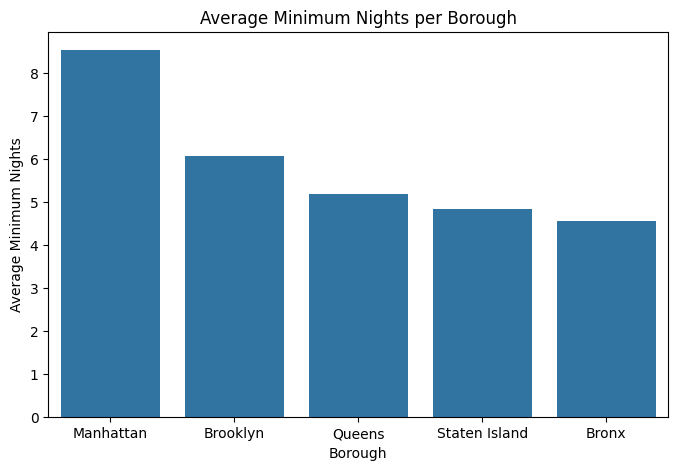

In [11]:
plot_avg_minimum_nights_per_borough(df1)

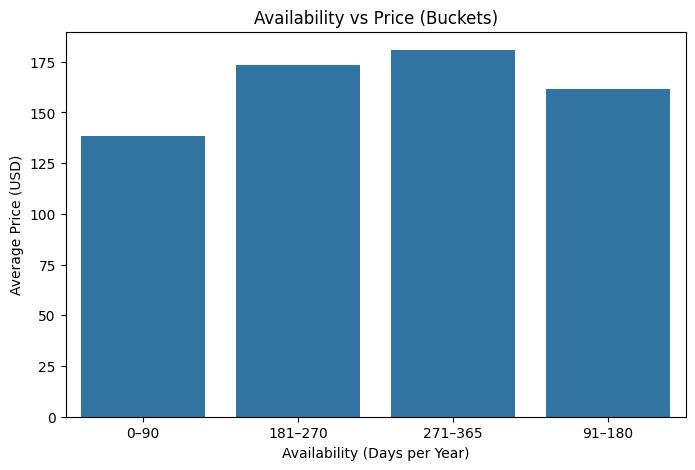

In [12]:
plot_avg_price_by_availability_bucket(df1)

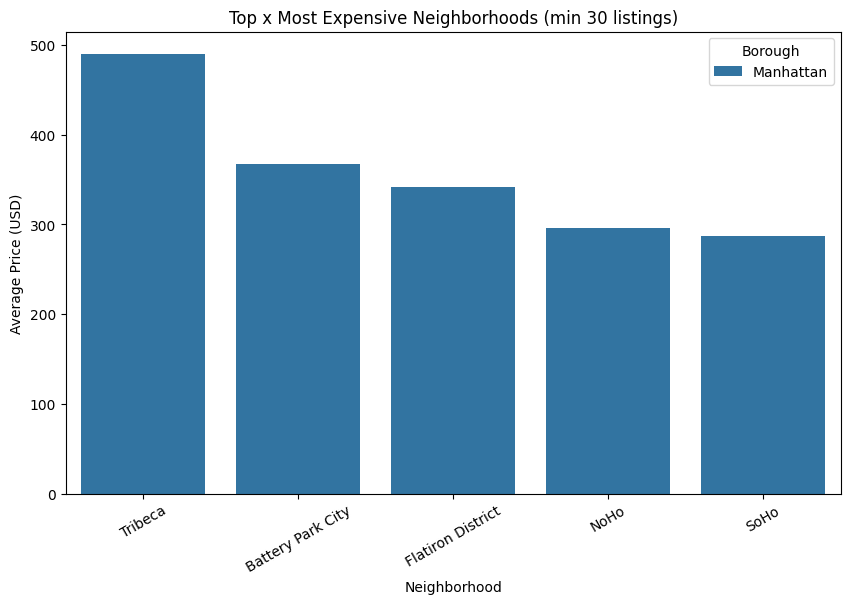

In [14]:
plot_topX_expensive_neighborhoods_min_listings(df1,30)